# Selected methods in mathematical statistics - regression analysis

In [1]:
import sys, os; sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from data.generator import *
from data import filters
from data import utils
%precision 4
%matplotlib inline
#%matplotlib notebook

## Simple linear regression

 - approach for modeling the relationship between variable y and x
 - linear regression model assumes that the relationship between the dependent variable y and x is linear
 - The goal is to find the equation of the straight line:
     - data line $y$ is represented as $y = \beta x + \alpha$
 
### Example of linear regression line
![Linear regression example](img/lin_reg.png)

### Finding line coefficients $\hat{\beta}$ and $\hat{\alpha}$ using LMS

 - Least Mean Squares (LMS) method
 - two goals:
   1. the maximum variance along line
   2. the minimum error from point to line

$$\hat{\beta} = \sum {y_i(x - \bar{x}}) / \sum{(x_i - \bar{x})^2} = \frac{\bar{xy} - \bar{x}\bar{y}} { \bar{x^2} - \bar{x}^2 }$$
$$\hat{\alpha} = \bar{y} - \hat{\beta}\bar{x}$$

![PCA](img/PCA.gif)

beta, alpha = 2.109647, 46.657158
m,    c     = 2.109647, 46.657152
beta, alpha = -0.974644, 24.019274
m,    c     = -0.974644, 24.019274


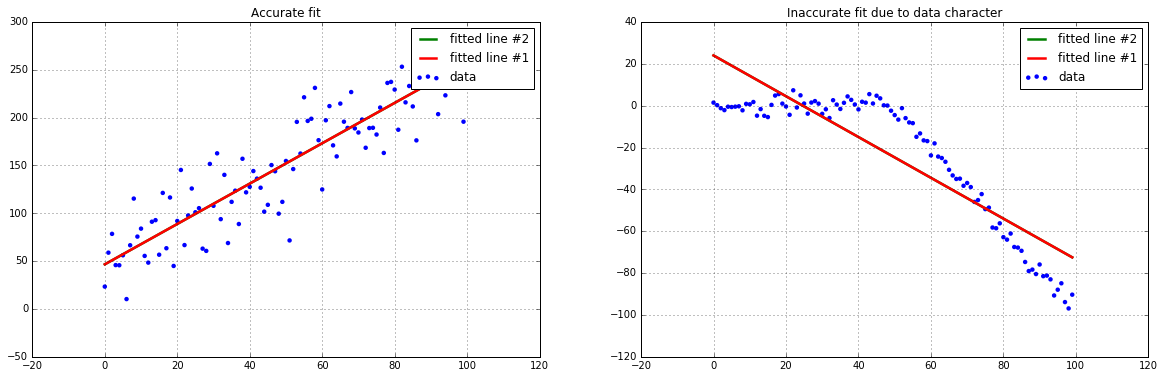

In [2]:
# linear regression
mu = 50
sigma = 30
size = 100
scale = 2
# ------------------------------------------------------
x1, y1 = generate([
    DataConfig(size, linear_generator(scale, mu, sigma))
])

x2, y2 = generate(
     [
         DataConfig(int(size/2), constant_generator(sigma=sigma/10)),
         DataConfig(size - int(size/2), linear_generator(-scale, sigma=sigma/10))
     ]
)
# ------------------------------------------------------
# set size
plt.figure(figsize=(20,6))

def regression_line(x, y):
    beta = np.sum(y * (x - np.mean(x))) / np.sum((x - np.mean(x)) * (x - np.mean(x)))
    alpha = np.mean(y) - (beta * np.mean(x))
    return beta, alpha

def experiment(x, y, title):
    # plot data
    plt.grid(True)
    plt.scatter(x, y, c='blue', edgecolors='none', label='data')
    plt.title(title)

    # solution 1
    b, a = regression_line(x, y)

    # solution 2
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y)[0]

    # linear regression coef
    print ('beta, alpha = {:1.6f}, {:1.6f}'.format(b, a))
    print ('m,    c     = {:1.6f}, {:1.6f}'.format(m, c))

    # plot lines (they should be overlapping)
    plt.plot(x, x*m + c, 'g', label='fitted line #2', lw=2.5)
    plt.plot(x, x*b + a, 'r', label='fitted line #1', lw=2.5)
    plt.legend();

# plot experiment 1
plt.subplot(1, 2, 1)
experiment(x1, y1, 'Accurate fit')

# plot experiment 2
plt.subplot(1, 2, 2)
experiment(x2, y2, 'Inaccurate fit due to data character')

## Polynomial regression 

 - polynomial regression is a form of linear regression in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree **polynomial**

### Simple linear model:
$y = a_0 + a_1 x + \varepsilon$

### Quadratic  model
$y = a_0 + a_1 x + a_2 x^2 + \varepsilon$

### Polynomial regression model
$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_n x^n + \varepsilon = $

$\begin{bmatrix} y_1\\ y_2\\ y_3 \\ \vdots \\ y_n \end{bmatrix}= \begin{bmatrix} 1 & x_1 & x_1^2 & \dots & x_1^m \\ 1 & x_2 & x_2^2 & \dots & x_2^m \\ 1 & x_3 & x_3^2 & \dots & x_3^m \\ \vdots & \vdots & \vdots & & \vdots \\ 1 & x_n & x_n^2 & \dots & x_n^m \end{bmatrix} \begin{bmatrix} a_0\\ a_1\\ a_2\\ \vdots \\ a_m \end{bmatrix} + \begin{bmatrix} \varepsilon_1\\ \varepsilon_2\\ \varepsilon_3 \\ \vdots \\ \varepsilon_n \end{bmatrix}$

#### Finding coefficients $\vec a$ using LMS
$\widehat{\vec a} = (\mathbf{X}^T \mathbf{X})^{-1}\; \mathbf{X}^T \vec y$

[ 50.9331   1.9819]
[  5.0647e+01   1.9994e+00  -1.7710e-04]
[ 23.3773  -0.9732]
[-6.8037  0.8746 -0.0187]
[ -1.4860e+01   9.4734e-01   1.2230e-04]
[  7.0689e+00  -1.7794e+00   6.9326e-02  -4.6602e-04]


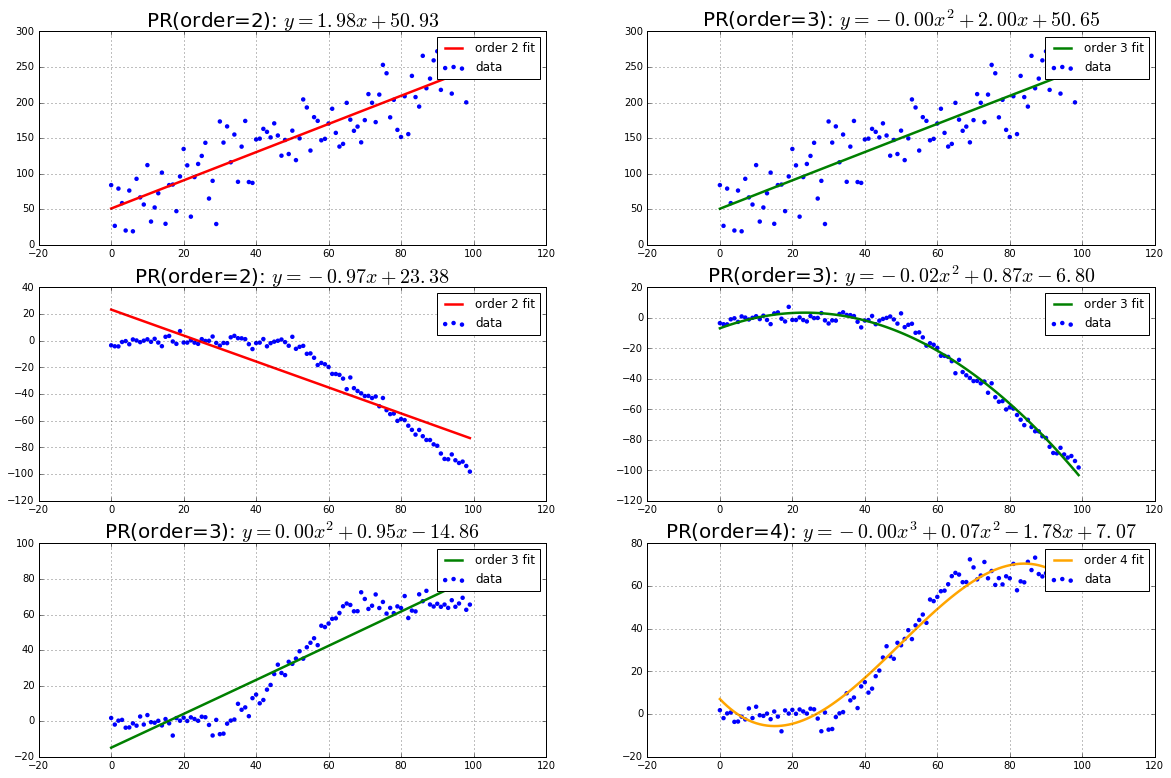

In [3]:
# linear regression
mu = 50
sigma = 30
size = 100
scale = 2
# ------------------------------------------------------
x1, y1 = generate([
    DataConfig(size, linear_generator(scale, mu, sigma))
])

x2, y2 = generate(
     [
         DataConfig(int(size/2), constant_generator(sigma=sigma/10)),
         DataConfig(size - int(size/2), linear_generator(-scale, sigma=sigma/10))
     ]
)

x3, y3 = generate(
     [
         DataConfig(int(size/3), constant_generator(sigma=sigma/10)),
         DataConfig(int(size/3), linear_generator(scale, sigma=sigma/10)),
         DataConfig(size - int(size/3)*2, constant_generator(sigma=sigma/10, mu=int(size/3) * scale)),
     ]
)
# ------------------------------------------------------
# set size
plt.figure(figsize=(20,13))
order_colors = ['b', 'b', 'r', 'g', 'orange'] + ['k'] * 10


def experiment(x, y, order):
    plt.scatter(x, y, edgecolors='none', label='data')
    plt.grid(True)
    X = np.vstack([x ** p for p in range(order)]).T
    alpha = np.zeros(len(x))
    coef = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    print(coef)
    
    y_fit = sum([coef[p] * (x ** p) for p in range(order)])
    plt.plot(x, y_fit, order_colors[order], label='order %d fit' % order,  lw=2.5)
    plt.title('PR(order=%d): %s' % (order, utils.poly2latex(coef, digit=2)), fontsize=20)
    plt.legend()
    

orders = [2, 3]
# plot experiment 1 and 2
for order in orders:
    plt.subplot(3, 2, orders.index(order) + 1)
    experiment(x1, y1, order)

# plot experiment 3 and 4
for order in orders:
    plt.subplot(3, 2, orders.index(order) + 3)
    experiment(x2, y2, order)

# plot experiment 5 and 6
orders = [3, 4]
for order in orders:
    plt.subplot(3, 2, orders.index(order) + 5)
    experiment(x3, y3, order)


## Kernel estimate

- estimating character of the dataset
- if regression dependence is unknown we try to reveal it using kernel function $w(z)$
- smooth dataset using kernel function which for given point $x$ returns new value. Kernel function takes into account surroundings of point $x$ (points $x_i$ where $i < d$, parameter $d$ is sometimes called *window size*

### Example of different kernel functions
![kernels](img/kernel_functions.png)

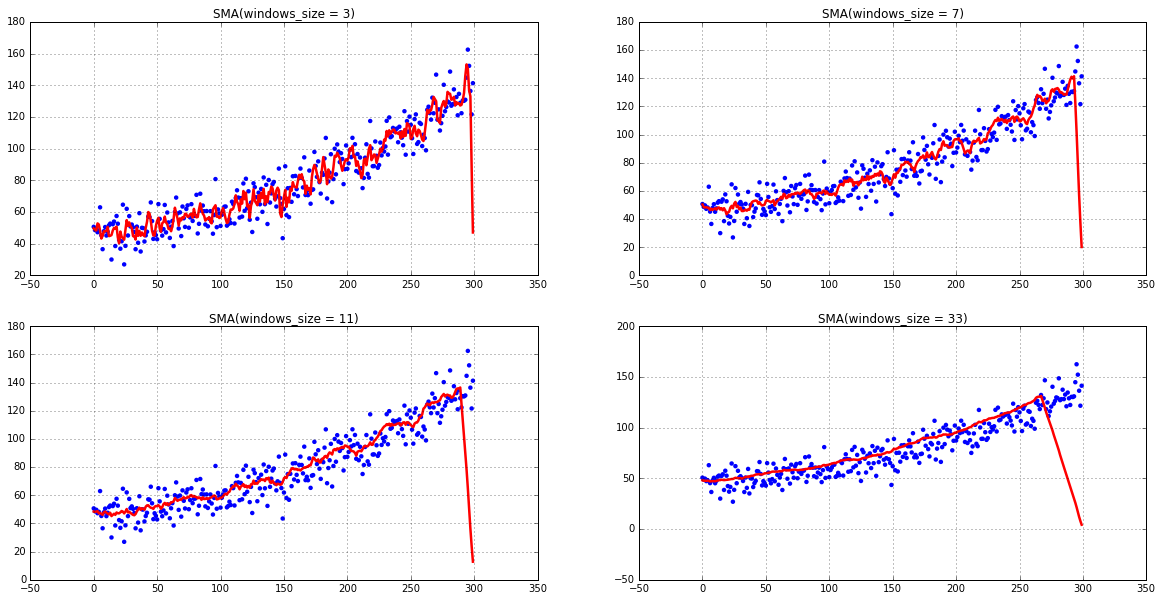

In [4]:
# kernel estimate
mu = 50
sigma = 10
size = 300
scale = 0.001
power = 2
# ------------------------------------------------------
data = generate([
    DataConfig(size, exponential_generator(scale, power, mu, sigma))
])

def plot_result(data, window_size, color='red'):
    plt.grid(True)
    plot(data, 'b', 'scatter', edgecolor='none')
    plot(filters.sma_filter(*data, l=window_size), color, 'plot', lw=2.5)
    plt.title('SMA(windows_size = %d)' % window_size)

# setup plot size
plt.figure(figsize=(20,10))


# Moving average filter with different window_size
window_sizes = [3, 7, 11, 33]
for window_size in window_sizes:
    plt.subplot(2, 2, window_sizes.index(window_size) + 1)
    plot_result(data, window_size)